***Prepared by Nabil Affo***

###Tuber Predict Model tells what kind of tuber (yam, cassava, sweet potato) is in a picture given as input. Those tubers are found in Togo and consumed a lot

In [0]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
from fastai import *
from fastai.vision import *

##Gathering data from Google Images
To build the model, We start buy gathering some data. We choose to get the data from Google Images. 
In our case, we need download three kinds of images: 


1.   Yam images
2.   Cassava images
3.    Sweet potato images

We search "Yam tuber", ''Cassava tuber", "Sweeet potato" respectively  in Google Images and save the urls of corresponding image results into seperate files using this command : 

```
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

Then we create different folders in our dataset repository for our different categories.  We put the url files in the corresponding folder within the dataset repository. And we download the images using the function 



```
download_images()

```








***Data gathering for "yam"***

In [0]:
folder = 'yam'
file = 'yam.txt'

In [0]:
path = Path(base_dir + 'data/tuber')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
dest


PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/yam')

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Error https://bellarmart.com/wp-content/uploads/2017/02/abuja-yam.jpg HTTPSConnectionPool(host='bellarmart.com', port=443): Max retries exceeded with url: /wp-content/uploads/2017/02/abuja-yam.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error x-raw-image:///1e969d9c488ea4b5c161c9ace34ac4db692d30b5e7b134ecc2aa1d72c8f1a3fc No connection adapters were found for 'x-raw-image:///1e969d9c488ea4b5c161c9ace34ac4db692d30b5e7b134ecc2aa1d72c8f1a3fc'
Error https://www.omicsonline.org/articles-images/food-processing-technology-Yam-tuber-7-642-g001.png HTTPSConnectionPool(host='www.omicsonline.org', port=443): Read timed out. (read timeout=4)
Error https://www.omicsonline.org/articles-images/food-processing-technology-Yam-tuber-7-642-g003.png HTTPSConnectionPool(host='www.omicsonline.org', port=443): Read timed out. (read timeout=4)
Error https://banner2.kisspng.com/20180611/bgs/kisspng-taro-ball-tuber-yam-ingredient-5b1ec4850d157

***Data gathering for "cassava"***

In [0]:
folder = 'cassava'
file = 'cassava.txt'

In [0]:
path = Path(base_dir + 'data/tuber')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
dest

PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/cassava')

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Error https://cdn.intechopen.com/books/images_new/6308.jpg HTTPSConnectionPool(host='cdn.intechopen.com', port=443): Max retries exceeded with url: /books/images_new/6308.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))
Error https://imgusr.tradekey.com/o-10333099-20181101033431/fresh-cassava-tubers-and-sweet-tapioca-fresh-cassava.jpg HTTPSConnectionPool(host='imgusr.tradekey.com', port=443): Max retries exceeded with url: /o-10333099-20181101033431/fresh-cassava-tubers-and-sweet-tapioca-fresh-cassava.jpg (Caused by SSLError(SSLError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:847)'),))


***Data gathering for "sweet potato"***

In [0]:
folder = 'sweet_potato'
file = 'sweet_potato.txt'

In [0]:
path = Path(base_dir + 'data/tuber')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
dest

PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato')

In [0]:
download_images(path/folder/file, dest, max_pics=200)

Error https://greenharvest.com.au/Images/Plants/SweetPotatoKumara.png HTTPSConnectionPool(host='greenharvest.com.au', port=443): Max retries exceeded with url: /Images/Plants/SweetPotatoKumara.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fce99b46978>, 'Connection to greenharvest.com.au timed out. (connect timeout=4)'))
Error https://cdn.gurneys.com/images/475/15341.jpg HTTPSConnectionPool(host='cdn.gurneys.com', port=443): Max retries exceeded with url: /images/475/15341.jpg (Caused by SSLError(CertificateError("hostname 'cdn.gurneys.com' doesn't match either of '*.s3.amazonaws.com', 's3.amazonaws.com'",),))
Error https://greenharvest.com.au/Images/Plants/SweetPotatoNorthernStar.png HTTPSConnectionPool(host='greenharvest.com.au', port=443): Max retries exceeded with url: /Images/Plants/SweetPotatoNorthernStar.png (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7fce99b56780>, 'Connection to greenharves

In [0]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/yam'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/cassava'),
 PosixPath('/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato')]

***We have three (3) different classses for our model : yam, cassava, sweet potato***

In [0]:
classes = ['cassava','sweet_potato','yam']

***We delete the images that cannot be opened***

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

cassava


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/cassava/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/cassava/00000174.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


sweet_potato


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000004.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000037.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000042.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000060.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000052.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000108.jpg'>
Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000140.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000157.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/sweet_potato/00000196.jpg'>
yam


cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000119.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000152.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000161.jpg'>
cannot identify image file <_io.BufferedReader name='/content/gdrive/My Drive/fastai-v3/data/tuber/yam/00000178.png'>


##View data##
We have a look on our data from the dataset we have just built.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['cassava', 'sweet_potato', 'yam']

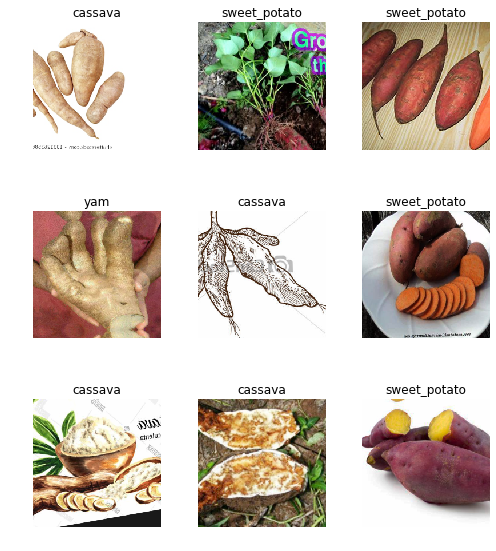

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cassava', 'sweet_potato', 'yam'], 3, 448, 112)

##Training the model
We create a convolutional neural network and train the model[link text](https://)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 58624246.69it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.296075,0.903098,0.366071,00:07
1,0.988651,0.893067,0.321429,00:08
2,0.830212,0.839781,0.294643,00:08
3,0.719341,0.822586,0.294643,00:08


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


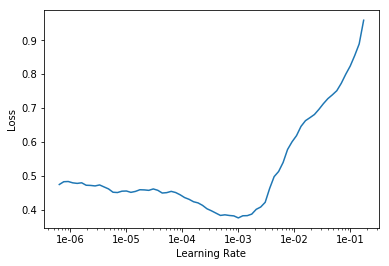

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(10, max_lr=slice(8e-5,5e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.509063,0.804850,0.276786,00:08
1,0.437718,0.765768,0.285714,00:08
2,0.375130,0.811083,0.312500,00:08
3,0.341948,0.890298,0.312500,00:08
4,0.297757,0.728524,0.250000,00:08
5,0.265277,0.750271,0.267857,00:08
6,0.233925,0.831686,0.276786,00:08
7,0.210512,0.868144,0.267857,00:08
8,0.185516,0.872498,0.267857,00:08
9,0.170034,0.860805,0.267857,00:09


In [0]:
learn.save('stage-2')

##Interpretation
We interpret the performance of our model with the aid of the confusion matrix.

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

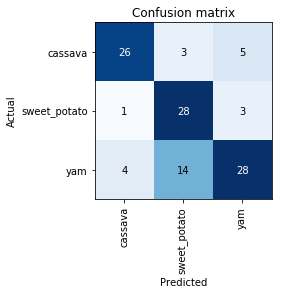

In [0]:
interp.plot_confusion_matrix()

##Cleaning
To improve our model, we can clean the data automattically or manually (which can be time consumming and borring or painful)

In [0]:
# from fastai.widgets import *

In [0]:
# db = (ImageList.from_folder(path)
#                    .split_none()
#                    .label_from_folder()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [0]:
# learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

# learn_cln.load('stage-2');

In [0]:
# ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
# ImageRelabeler (ds, idxs, path) #ImageCleaner is removed

In [0]:
# ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
# ImageRelabeler(ds, idxs, path, duplicates=True)

In [0]:
# learn_cln.fit_one_cycle(4)

##Production
We export  the content of our Learner object for production. This creates the file "export.pkl". Then we input a test image and our model will classify it.

In [0]:
learn.export()

In [0]:
# defaults.device = torch.device('cpu') #if we want to use the cpu by default for the test of the model

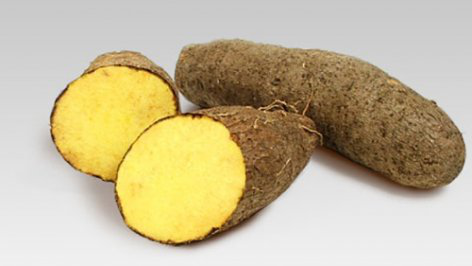

In [0]:
path1 = Path(base_dir + 'data/testfolder')
img = open_image(path/'guess.jpg')
img

In [0]:
path2 = Path(base_dir + 'data/tuber')
learn = load_learner(path2)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:454: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category yam